In [79]:
import itertools
import matplotlib.pyplot as plt

import cv2
import numpy as np
import os

import tensorflow as tf
from tensorflow.keras.models import load_model, Sequential

In [80]:
model = load_model(os.path.join("Models", "Synthetic_data_augmentation.keras"))

In [81]:
model.summary()

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_50 (Sequential)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_40 (Rescaling)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_117 (Conv2D)             │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_117               │ (None, 128, 128, 16)   │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_118 (Conv2D)             │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_118               │ (None, 64, 64, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_119 (Conv2D)             │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_119               │ (None, 32, 32, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_39 (Flatten)            │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,238,510 (96.28 MB)

 Trainable params: 8,412,836 (32.09 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,825,674 (64.18 MB)

In [82]:
# Trained intermediate layers.
intermediate_layers = model.layers[:5]

In [83]:
intermediate_model = Sequential(intermediate_layers)
intermediate_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_50 (Sequential)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_40 (Rescaling)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_117 (Conv2D)             │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_117               │ (None, 128, 128, 16)   │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_118 (Conv2D)             │ (None, 128, 128, 32)   │         4,640 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,088 (19.88 KB)

 Trainable params: 5,088 (19.88 KB)

 Non-trainable params: 0 (0.00 B)

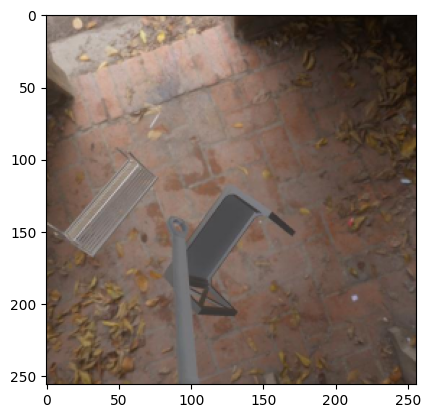

In [87]:
# Loading the image.
image = cv2.imread("Data/Synthetic/CombWrench/300_img.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
resize = cv2.resize(image, (256,256))

plt.imshow(resize)
plt.show()

In [88]:
yhat = intermediate_model.predict(np.expand_dims(resize, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


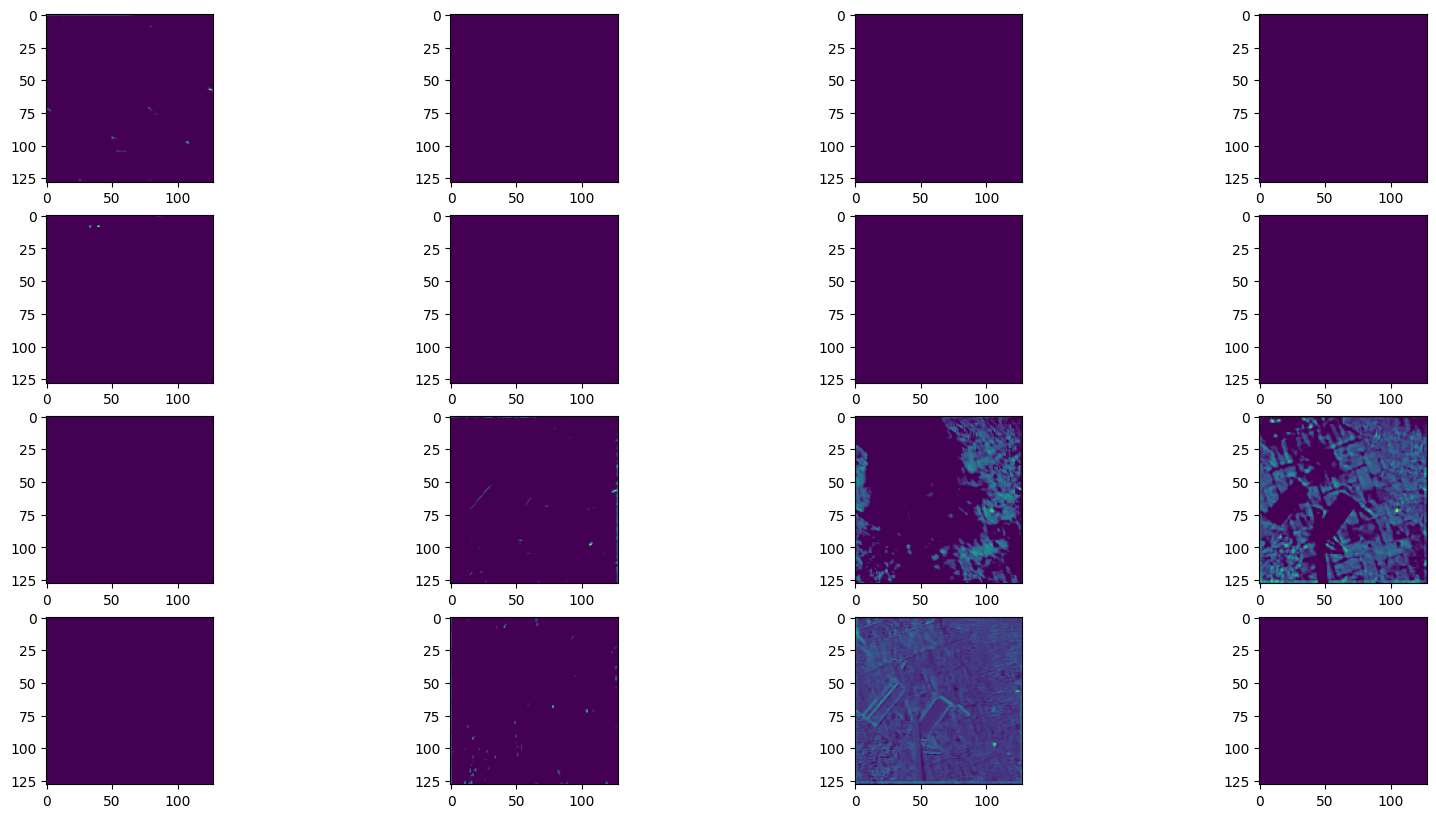

In [89]:
# Visualization Grid.
num_rows = 4
num_cols = 4

fig, ax = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(20,10))
for idx, ax_idx in enumerate(list(itertools.product(range(num_cols), range(num_rows)))):
    ax[ax_idx[1], ax_idx[0]].imshow(yhat[0, :, :, idx])